In [77]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import itertools

In [18]:
train = pd.read_csv('../data/train.csv')
path = train.loc[0][1]



0       Airport
1       Airport
2       Airport
3       Airport
4       Airport
         ...   
7995      River
7996      River
7997      River
7998      River
7999      River
Name: label, Length: 8000, dtype: object

In [43]:
path = '../data/AID/'

arr = []
for root, folder, files in os.walk(path):
    for file in files:
        print(f'{root} / {file} \n')
        path = root+'/'+file
        label = root.split('/')[-1]
        arr.append([path, label])




../data/AID/Airport / airport_1.jpg 

../data/AID/Airport / airport_10.jpg 

../data/AID/Airport / airport_100.jpg 

../data/AID/Airport / airport_101.jpg 

../data/AID/Airport / airport_102.jpg 

../data/AID/Airport / airport_103.jpg 

../data/AID/Airport / airport_104.jpg 

../data/AID/Airport / airport_105.jpg 

../data/AID/Airport / airport_106.jpg 

../data/AID/Airport / airport_107.jpg 

../data/AID/Airport / airport_108.jpg 

../data/AID/Airport / airport_109.jpg 

../data/AID/Airport / airport_11.jpg 

../data/AID/Airport / airport_110.jpg 

../data/AID/Airport / airport_111.jpg 

../data/AID/Airport / airport_112.jpg 

../data/AID/Airport / airport_113.jpg 

../data/AID/Airport / airport_114.jpg 

../data/AID/Airport / airport_115.jpg 

../data/AID/Airport / airport_116.jpg 

../data/AID/Airport / airport_117.jpg 

../data/AID/Airport / airport_118.jpg 

../data/AID/Airport / airport_119.jpg 

../data/AID/Airport / airport_12.jpg 

../data/AID/Airport / airport_120.jpg 

../da

In [44]:
df = pd.DataFrame(columns=['path', 'label'], data=arr)

In [45]:
df.to_csv('../data/meta.csv', index=False)

del meta

In [61]:
from sklearn.model_selection import train_test_split
meta = pd.read_csv('../data/meta.csv')
meta

,path,label
0,../data/AID/Airport/airport_1.jpg,Airport
1,../data/AID/Airport/airport_10.jpg,Airport
2,../data/AID/Airport/airport_100.jpg,Airport
3,../data/AID/Airport/airport_101.jpg,Airport
4,../data/AID/Airport/airport_102.jpg,Airport
...,...,...
9995,../data/AID/Viaduct/viaduct_95.jpg,Viaduct
9996,../data/AID/Viaduct/viaduct_96.jpg,Viaduct
9997,../data/AID/Viaduct/viaduct_97.jpg,Viaduct
9998,../data/AID/Viaduct/viaduct_98.jpg,Viaduct


In [62]:
X, y = meta.iloc[:,0], meta.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [63]:
xtest = pd.DataFrame(X_test)
xtrain = pd.DataFrame(X_train)
ytest = pd.DataFrame(y_test)
ytrain = pd.DataFrame(y_train)

In [65]:
train = pd.concat([xtrain, ytrain], axis=1)
test = pd.concat([xtest, ytest], axis=1)

train.to_csv('../data/train.csv')
test.to_csv('../data/test.csv')

In [58]:
ytrain

,label
7949,River
7911,River
3338,Farmland
5925,Playground
6311,Pond
...,...
2711,DenseResidential
7104,RailwayStation
4676,MediumResidential
7008,Port


In [51]:
len(xtrain), len(ytrain)

(8000, 8000)

In [42]:
import torch
torch.cuda.is_available()

C:\Users\mjan2021\Documents\GitHub\Scene_Classification\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
import sys
sys.path.insert(0,'C://Users/mjan2021/Documents/GitHub/Scene_Classification/src')

In [72]:
from dataset import SceneClassification

In [73]:
d = SceneClassification('../data/AID/', '../data/train.csv')

30

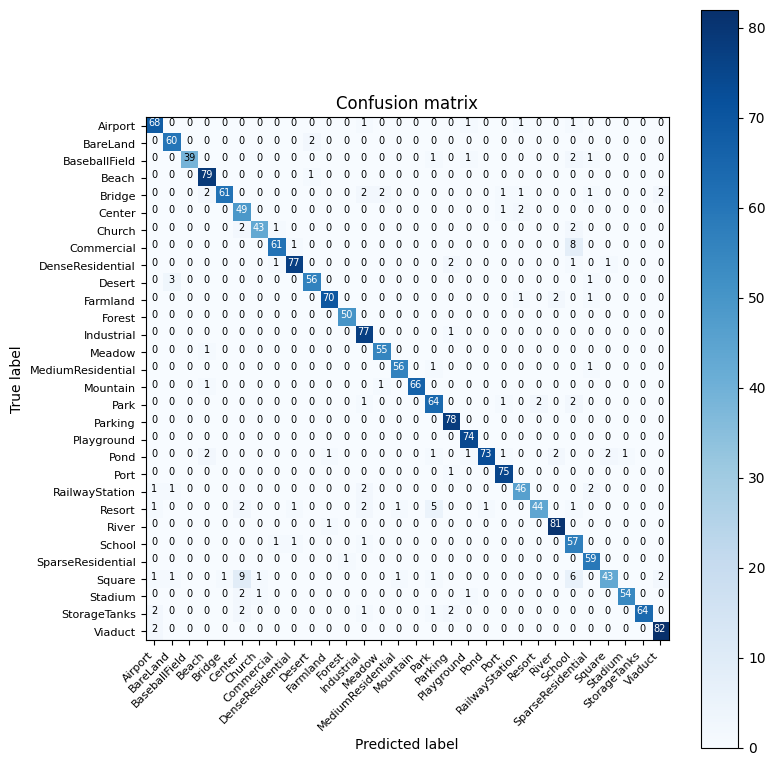

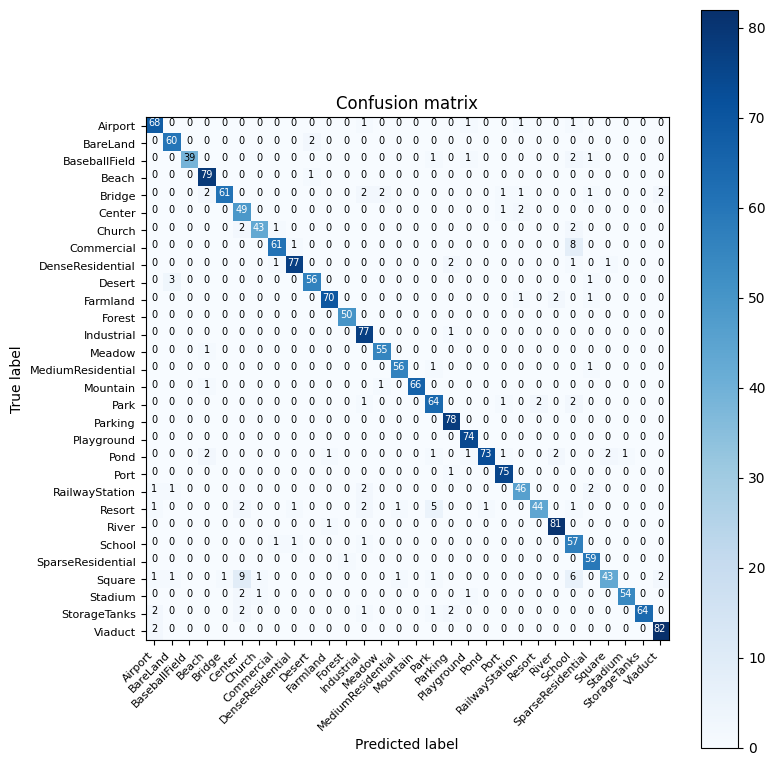

In [79]:
files = os.listdir('../output_files/')
ar = np.load('../output_files/'+files[1])
plot_confusion_matrix(ar, d.classes)

In [71]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """

    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, fontsize=8, horizontalalignment='right')
    plt.yticks(tick_marks, class_names, fontsize=8)

    # Normalize the confusion matrix.
    # cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color, fontsize=7)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [89]:
meta = pd.read_csv('../data/meta.csv')
clss = meta['label'].value_counts()

# plt.bar(clss.keys(), clss.values())
clss.keys()

Index(['Viaduct', 'Pond', 'River', 'DenseResidential', 'Beach', 'Industrial',
       'Parking', 'Port', 'Playground', 'Farmland', 'StorageTanks', 'Airport',
       'Bridge', 'Park', 'Commercial', 'Mountain', 'Square', 'BareLand',
       'SparseResidential', 'Desert', 'School', 'MediumResidential', 'Stadium',
       'Resort', 'Meadow', 'RailwayStation', 'Center', 'Forest', 'Church',
       'BaseballField'],
      dtype='object')